In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Defining Problem Statement and Analysing basic metrics

We need to explore data to understand and answer how Netflix can grow their business. What is working for them and how they can plan ahead. The challenges that we will face during the analysis will be dealing with missing values,multiple values in columns and datatype of the columns

In [99]:
! gdown 1XNHfxmS7qeUSGDHrCrbU-GVS6TPtkEpz

Downloading...
From: https://drive.google.com/uc?id=1XNHfxmS7qeUSGDHrCrbU-GVS6TPtkEpz
To: /content/Netflix.csv
100% 3.40M/3.40M [00:00<00:00, 168MB/s]


In [100]:
# Read the csv file
df=pd.read_csv("Netflix.csv")

In [101]:
# List of columns in the data
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [102]:
# Top 5 rows from the data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [103]:
# Check duplicate entries
df[df.duplicated]
# There are no duplicate entries in the data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


## 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [104]:
# Shape of the data
df.shape

(8807, 12)

In [105]:
# Dimension of the data
df.ndim

2

In [106]:
# Data type of data
type(df)

pandas.core.frame.DataFrame

In [107]:
# Basic information of the data
df.info()
# Director, cast, country, and date_added has NaN values. We also have minor missing values in rating and duration columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [108]:
# Changing datatype of the columns

df["date_added"]=pd.to_datetime(df["date_added"])
df["director"]=df["director"].astype(dtype="string")
df["cast"]=df["cast"].astype(dtype="string")
df["listed_in"]=df["listed_in"].astype(dtype="string")
df["country"]=df["country"].astype(dtype="string")
df["duration"]=df["duration"].astype(dtype="string")

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   string        
 4   cast          7982 non-null   string        
 5   country       7976 non-null   string        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   string        
 10  listed_in     8807 non-null   string        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5), string(5)
memory usage: 825.8+ KB


In [110]:
# Statistical details of the data
df.describe(include="all")

<ipython-input-110-28f691dd05f4>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1714,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,2020-01-01 00:00:00,NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,110,NaN,3207,1793,362,4
first,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN


In [111]:
# Checking the null values in columns and getting boolean values
df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

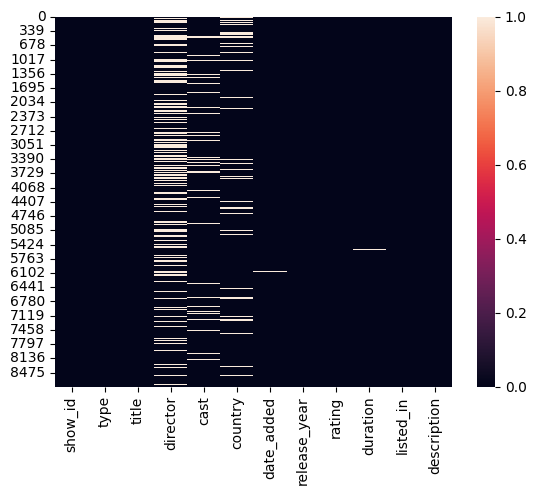

In [112]:
# Heatmap for null values
sns.heatmap(df.isnull())

## 3. Dealing with missing values

In [113]:
# Using interpolate to filling the missing values

df=df.interpolate(method="pad",limit_direction="forward")
df.fillna("Anonymous",inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Anonymous,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Kirsten Johnson,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",South Africa,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",South Africa,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Julien Leclercq,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## 4. Non-Graphical and visual analysis of data

In [114]:
# Movies vs TV Show Count
df.groupby("type")[["type"]].value_counts()

type
Movie      6131
TV Show    2676
dtype: int64

<Axes: xlabel='type', ylabel='count'>

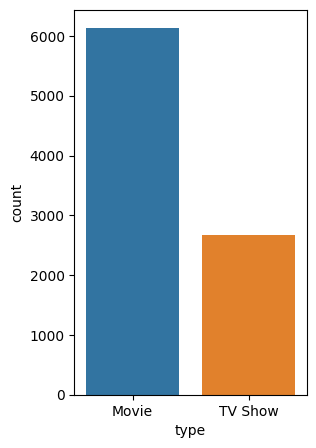

In [115]:
plt.figure(figsize=(3,5))
sns.countplot(df,x="type")

We can see that Netflix has 6131 Movies and 2676 TV Shows. 

In [116]:
# Unnesting country's column for further analysis
df_c=df.assign(country=df['country'].str.split(',')).explode('country')
df_c

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Anonymous,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Kirsten Johnson,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",South Africa,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",South Africa,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Julien Leclercq,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [117]:
# Count of movies and tv shows contributed by each country
df_country=df_c.groupby("country")[["title"]].count().sort_values(by="title",ascending=False).rename(columns={"title":"count"}).reset_index()
df_c1=df_country.head(6)
df_c1

,country,count
0,United States,3537
1,India,1111
2,United Kingdom,687
3,United States,518
4,Canada,291
5,Japan,284


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, ' United States'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Japan')])

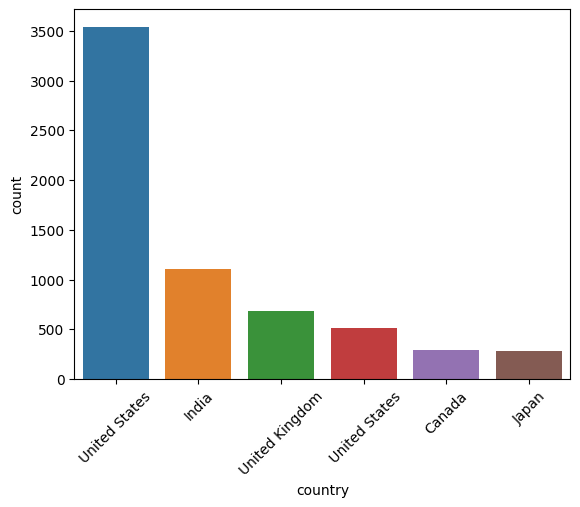

In [118]:
sns.barplot(df_c1,x="country",y="count")
plt.xticks(rotation=45)

In [119]:
# Top 5 genres United States has contributed into
df_c.query('country=="United States"')[["listed_in"]].value_counts().head(5).reset_index().rename(columns={0:"count"})

,listed_in,count
0,Documentaries,278
1,Stand-Up Comedy,231
2,"Children & Family Movies, Comedies",130
3,Kids' TV,121
4,Children & Family Movies,117


Top 5 contributors on Netflix are United States, India, United Kingdom, Canada and Japan with United States on the top with count of 4224 which includes Documentaries as the top listed category.

In [120]:
# Top viewed genre on Netflix 
df_g=df.assign(listed_in=df['listed_in'].str.split(',')).explode('listed_in')
df_g["listed_in"].value_counts().head()

 International Movies    2624
Dramas                   1600
Comedies                 1210
Action & Adventure        859
Documentaries             829
Name: listed_in, dtype: int64

Netflix has most content in International movies category. Here we assume that the Netflix has more content that people watch. Hence, the highest count of the genre will be the most viewed genre

In [121]:
# Number of movies and tv shows released every year
df.groupby("release_year")[["type"]].count().rename(columns={"type":"count"}).sort_values(by="count",ascending=False).head(10)

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
2021,592
2015,560
2014,352
2013,288


<Axes: xlabel='release_year', ylabel='Count'>

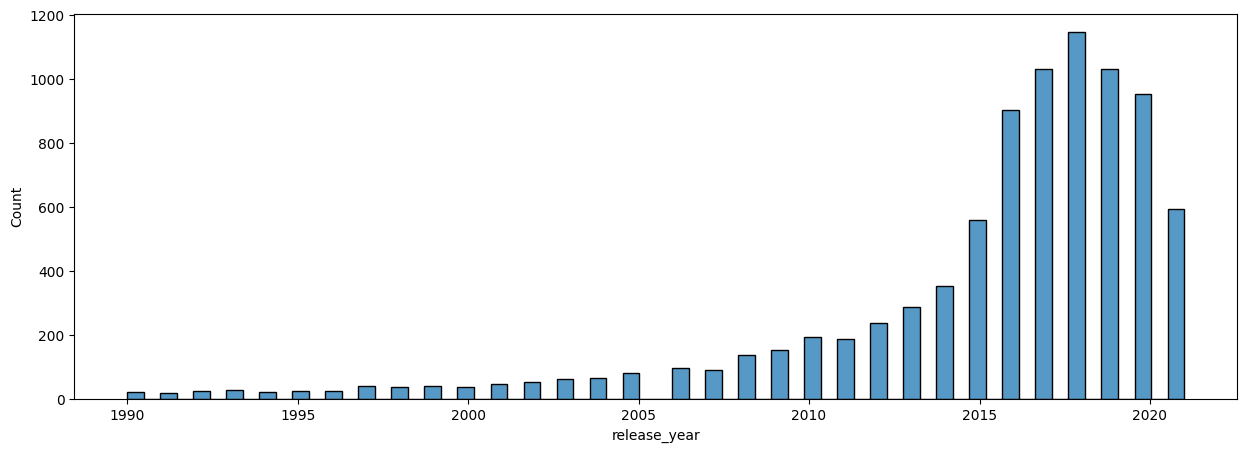

In [122]:
# Number of movies and shows release in the past 30 years
plt.figure(figsize=(15,5))
sns.histplot(df,x=df.query('release_year>=1990')["release_year"])

<Axes: xlabel='release_year', ylabel='Count'>

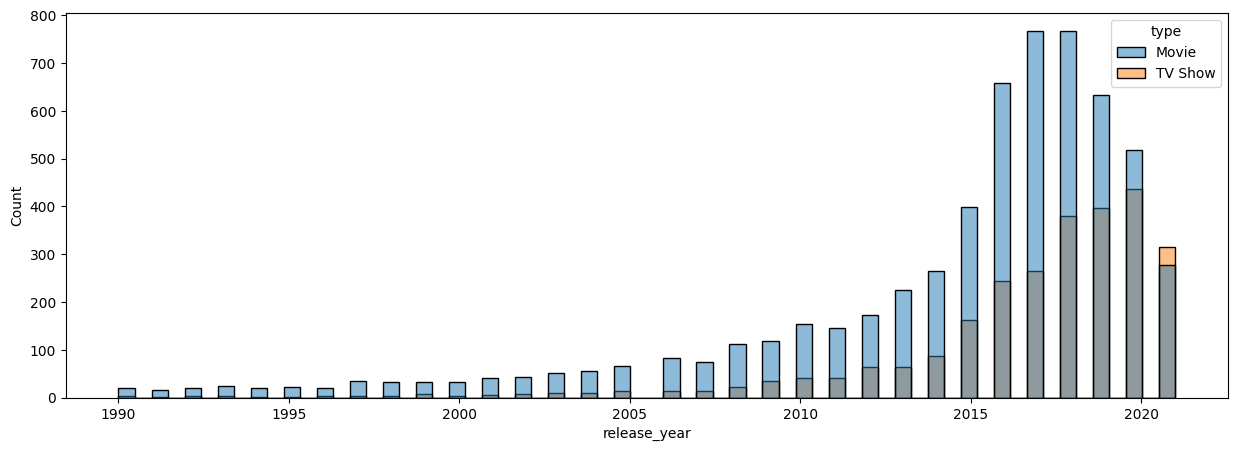

In [123]:
# Number of movies vs shows release in the past 30 years
plt.figure(figsize=(15,5))
sns.histplot(df,x=df.query('release_year>=1990')["release_year"],hue="type")

<Axes: xlabel='release_year', ylabel='type'>

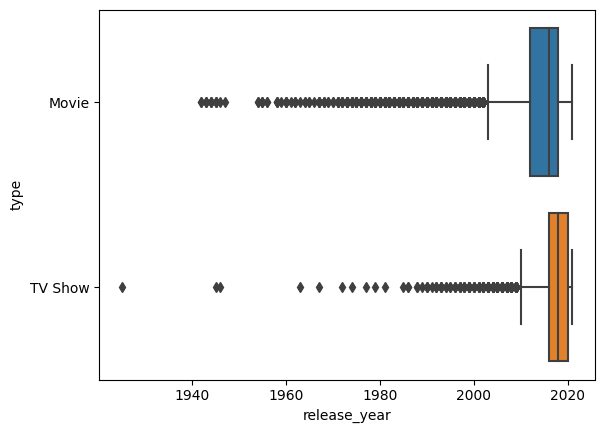

In [124]:
# Graphial repesentation via boxplot
sns.boxplot(df,x="release_year",y="type")

Most content was released in 2018 on Netflix. However, most of the TV show was released in 2020. From the chart we can see that Netflix has always focused more on Movies rather than Tv shows unlike in 2021 where Tv show was more than movies

In [125]:
# Best time to launch a tv vs movies
df["added_month"]=df["date_added"].dt.month_name()
df.query('type=="Movie"')[["added_month"]].value_counts()

added_month
July           565
April          550
December       547
January        546
October        545
March          529
August         519
September      519
November       498
June           492
May            439
February       382
dtype: int64

In [126]:
df.query('type=="TV Show"')[["added_month"]].value_counts()

# Best time to launch a movie is July and tv show is December as the previous data shows that has monst movies and shows have been launched during that month.

added_month
December       266
July           262
September      253
June           237
August         236
October        216
April          215
March          214
November       207
May            195
January        192
February       183
dtype: int64

<Axes: xlabel='added_month', ylabel='count'>

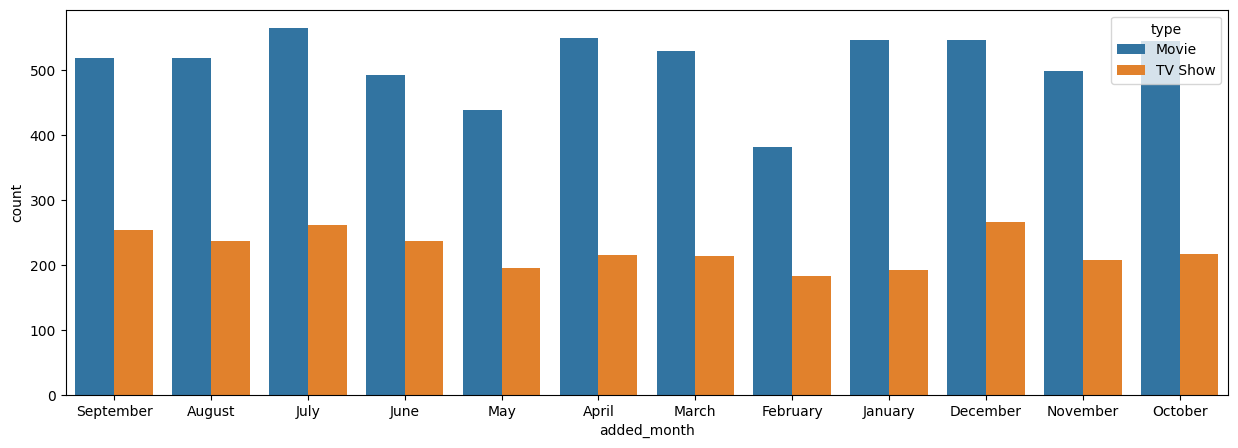

In [127]:
#  Graphical representation of best time to launch a movie and tv show
plt.figure(figsize=(15,5))
df["added_month"]=df["date_added"].dt.month_name()
sns.countplot(df,x=df["added_month"],hue="type")

From the charts we can conclude that mostly movies are launched in July and Tv shows in December. As per the data, July and December will be a good time to launch movies and tv shows respectively.

In [128]:
# Top 10 directors who has produced max number of movies or tv shows
df_d=df.assign(director=df['director'].str.split(',')).explode('director')
df_d

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Anonymous,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September
1,s2,TV Show,Blood & Water,Kirsten Johnson,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",South Africa,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September
3,s4,TV Show,Jailbirds New Orleans,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",South Africa,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September
4,s5,TV Show,Kota Factory,Julien Leclercq,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November
8803,s8804,TV Show,Zombie Dumb,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January


In [129]:
df_d.query('type=="Movie"')[["director"]].value_counts().head(10)

director           
Rajiv Chilaka          22
Raúl Campos            18
 Jan Suter             18
Jay Karas              16
Suhas Kadav            16
Marcus Raboy           15
Cathy Garcia-Molina    13
Youssef Chahine        13
Jay Chapman            12
Martin Scorsese        12
dtype: int64

In [130]:
df_d.query('type=="TV Show"')[["director"]].value_counts().head(10)

director         
Marcus Raboy         17
Steve McLean         16
Yen Cheng-kuo        14
Michèle Ohayon       10
Luis Valdez          10
 Alan Hicks           9
Yeo Siew Hua          9
Rashida Jones         9
Hardik Mehta          9
 Abhishek Chaubey     9
dtype: int64

In [131]:
# Top 10 casts on Netflix
df_cast=df.assign(cast=df['cast'].str.split(',')).explode('cast')
df_cast

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Anonymous,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September
1,s2,TV Show,Blood & Water,Kirsten Johnson,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September
1,s2,TV Show,Blood & Water,Kirsten Johnson,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September
1,s2,TV Show,Blood & Water,Kirsten Johnson,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September
1,s2,TV Show,Blood & Water,Kirsten Johnson,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,March
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,March
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,March
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,March


In [132]:
df_cast.query('type=="Movie"')[["cast"]].value_counts().head(10)

cast             
 Anupam Kher         39
 Paresh Rawal        29
 Rupa Bhimani        28
 Boman Irani         27
 Om Puri             27
Shah Rukh Khan       27
Akshay Kumar         26
 Julie Tejwani       25
 Naseeruddin Shah    22
 Kareena Kapoor      21
dtype: int64

In [133]:
df_cast.query('type=="TV Show"')[["cast"]].value_counts().head(10)

cast              
 Takahiro Sakurai     25
 Ai Kayano            18
 Junichi Suwabe       18
 Yuki Kaji            17
 Daisuke Ono          15
 Takehito Koyasu      14
David Attenborough    14
 Yuichi Nakamura      14
 Tomokazu Sugita      13
 Yoshimasa Hosoya     13
dtype: int64

As per the above analysis, Rajiv Chilaka has directed most movies and Marcus Raboy has directed most Tv shows. Anupam Kher and Takahiro Sakurai acted most movies and tv series present on Netflix.

In [134]:
# Analysis of rating
df["rating"].value_counts().head(10)

TV-MA    3208
TV-14    2161
TV-PG     863
R         801
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: rating, dtype: int64

In [135]:
df_cast.query('rating=="TV-MA"')["director"].value_counts()

Youssef Chahine                     113
Luis Valdez                         101
Hardik Mehta                         94
Marcus Raboy                         76
Ryan Polito                          76
                                   ... 
Eylem Kaftan                          1
Kirk Wise                             1
Shannon Hartman, Michelle Caputo      1
John Smithson                         1
Tanuja Chandra                        1
Name: director, Length: 2196, dtype: Int64

In [136]:
df_cast.query('rating=="TV-MA"')["cast"].value_counts()

 Takahiro Sakurai    20
 Yuki Kaji           14
 Takehito Koyasu     12
 Robb Wells          12
 Junichi Suwabe      11
                     ..
 Kim Hye-jun          1
 Heo Jun-ho           1
 Jung Suk-won         1
 Kim Jong-soo         1
 Mansoor Alfeeli      1
Name: cast, Length: 19034, dtype: int64

<Axes: >

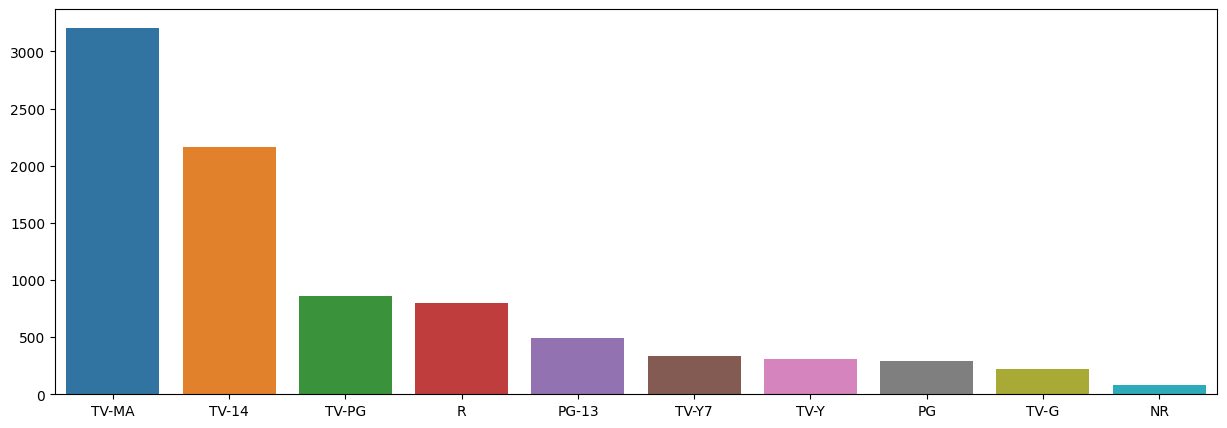

In [137]:
# Graphical representation of rating
plt.figure(figsize=(15,5))
rating=df["rating"].value_counts().head(10)
sns.barplot(df,x=rating.index,y=rating.values)

Netflix has most of the content for mature audiences and audience above the age of 14 i.e., TV-MA and TV-14. Youssef Chahine and  Takahiro Sakurai has directed and acted most content for TV-MA category respectively.

In [138]:
# Duration analysis
# Spliting the duration column
df["duration"]=df["duration"].str.split(expand=True)[0]
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Anonymous,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",September
1,s2,TV Show,Blood & Water,Kirsten Johnson,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",South Africa,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September
3,s4,TV Show,Jailbirds New Orleans,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",South Africa,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September
4,s5,TV Show,Kota Factory,Julien Leclercq,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November
8803,s8804,TV Show,Zombie Dumb,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-07-01,2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,November
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January


In [139]:
# Duration that has highest frequency on the movies data
df_dur=df.query('type=="Movie"')[["duration"]].value_counts().reset_index().rename(columns={"duration":"minutes", 0:"count"}).head(50)
df_dur.head()

,minutes,count
0,90,152
1,97,146
2,94,146
3,93,146
4,91,144


<Axes: xlabel='minutes', ylabel='count'>

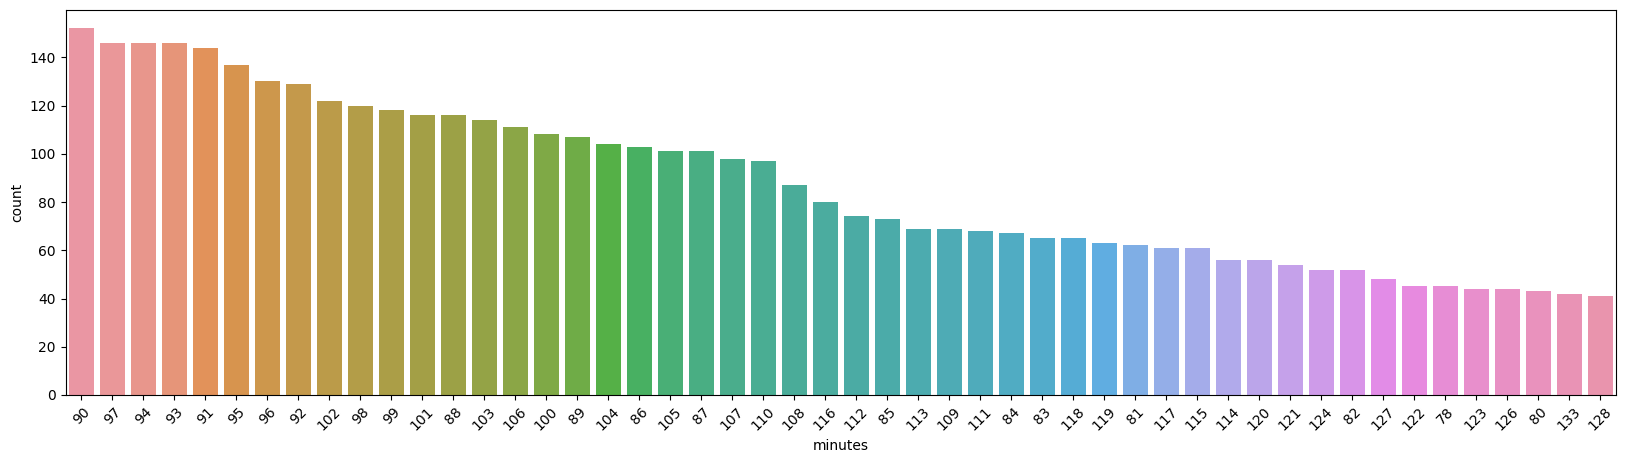

In [140]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.barplot(data=df_dur,x="minutes",y="count")

In [141]:
# Duration that has highest frequency on the TV Show data
df_dur1=df.query('type=="TV Show"')[["duration"]].value_counts().reset_index().rename(columns={"duration":"seasons", 0:"count"})
df_dur1.head()

,seasons,count
0,1,1793
1,2,425
2,3,199
3,4,95
4,5,65


<Axes: xlabel='seasons', ylabel='count'>

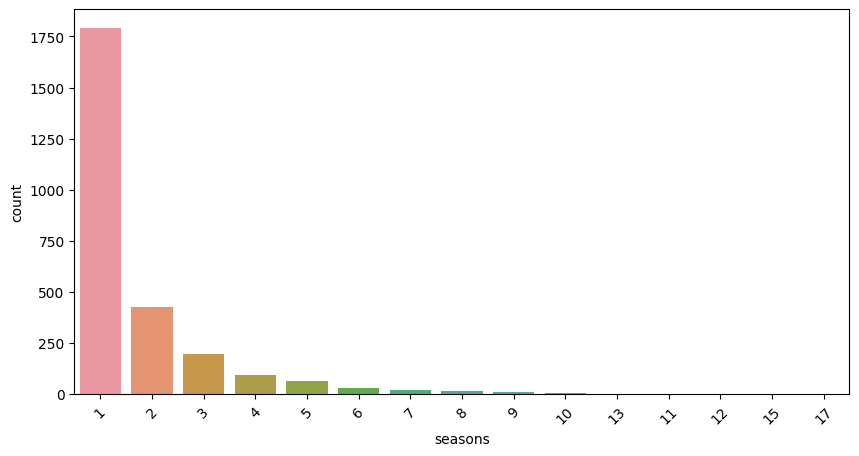

In [142]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(data=df_dur1,x="seasons",y="count")

Most favourable duration for movies is 90 minutes. Assuming there are equal number of episodes in each season, tv show with highest number of seasons will be most favourable considering more and more seasons are produced as per the previous seasons’ rating and TRP.

Netflix has more movies than tv shows. The United states has contributed most in the content. Netflix should focus on more content from the top 5 contributors (US, India, UK, Canada, Japan) of the content from international movies, dramas and comedies genre. It should also get more and more content directed from Rajiv Chilaka and Marcus Raboy.

Netflix has more content for mature population and anything else. We can infer that most of the people prefer to watch 90 mins of movies as when we compared it with other durations of the movies, it has the highest count. Assuming there are equal number of episodes in each season, tv show with highest number of seasons will me most favourable considering more and more seasons are produced as per the previous seasons’ rating and TRP.
